# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

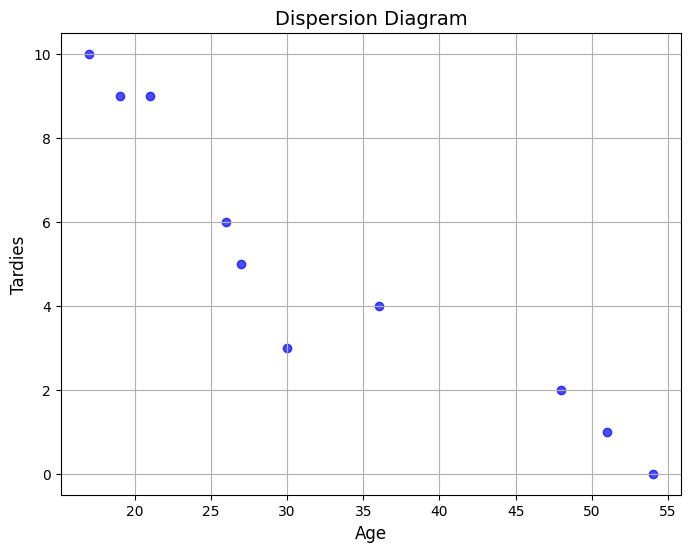

In [4]:
# Scatter plot


plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', alpha=0.7)
plt.title('Dispersion Diagram', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Tardies', fontsize=12)
plt.grid(True)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

There is a linear relationship, inversely proportional between the age of the student and how many times they are tardy. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Calculate covariance
# shows the relationship between two columns, indicating how changes in one are associated with changes in the other.
# 
covariance = student_data['Age'].cov(student_data['Tardies'])
print("Covariance:", covariance)

# Calculate correlation
# measures the strength and direction of a linear relationship. 
# ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation)
correlation = student_data['Age'].corr(student_data['Tardies'])
print("Correlation:", correlation)

#  correlation is close to -1, the relationship between the two columns is consistent in its inverse behavior.
#  covariance agrees with correlation in indicating an inverse relationship



Covariance: -45.56666666666666
Correlation: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Split the data into the independent variable (Age) and dependent variable (Tardies).

Age = student_data[['Age']]  
Tardies = student_data['Tardies']

Plot your regression model on your scatter plot.

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Using linear regression model from sklearn and fit
model = LinearRegression()
model.fit(Age, Tardies)

# Make predictions
Tardies_pred = model.predict(Age)

# Evaluate the model
mse = mean_squared_error(Tardies, Tardies_pred)
r2 = r2_score(Tardies, Tardies_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# MSE of 1.33  suggests that the model's errors are relatively low but should be considered 
# in scale.

# r2 value of 0.8820 indicates that 88.2% of the variance in the target variable is explained by the model. 
# i is a good fit for the data.


Mean Squared Error: 1.3319201847356268
R-squared: 0.8820265558250109


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# MSE of 1.33  suggests that the model's errors are relatively low but should be considered in scale.

# # r2 value of 0.8820 indicates that 88.2% of the variance in the target variable is explained by the model. 
# # i is a good fit for the data.

# Based on the current data, age appears to be a strong predictor of tardiness. 
# However, this conclusion has to be taken with caution due to the small sample. 

# To be more confident the study needs a larger, more diverse dataset with additional variables that might affect tardiness 
# (e.g., has a car, how far they live, if they have a job or not). 
# Test for non-linear relationships or interactions between age and other factors.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Variables in dataframe
categorical_variables = ("Make", "Model", "Transmission", "Drivetrain", "Vehicle Class", "Fuel Type")
numerical_variables = ("Engine Displacement", "Fuel Barrels/Year", "City MPG", "Highway MPG", "Combined MPG", "CO2 Emission Grams/Mile", "Fuel Cost/Year")
ordinal_variables = ("Year")


c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dbigman\AppData\Local\Temp\ipykernel_26772\1839721001.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


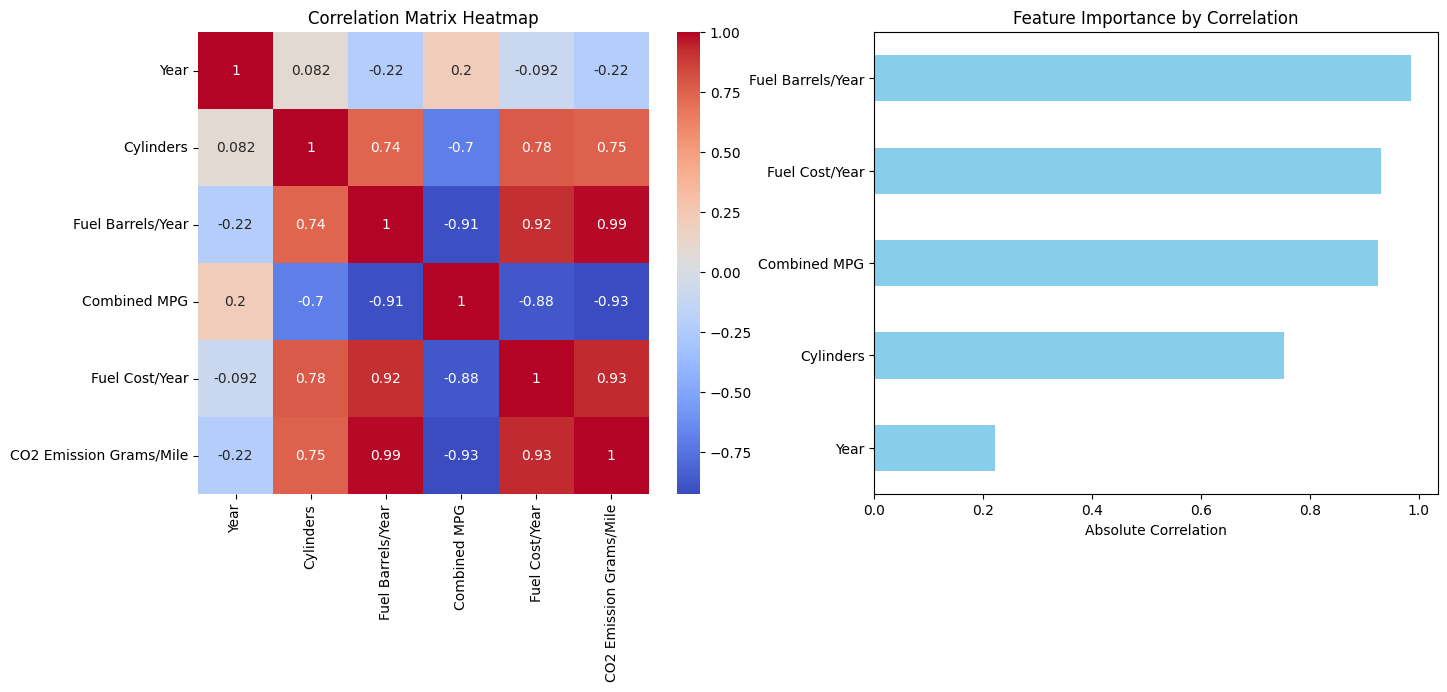

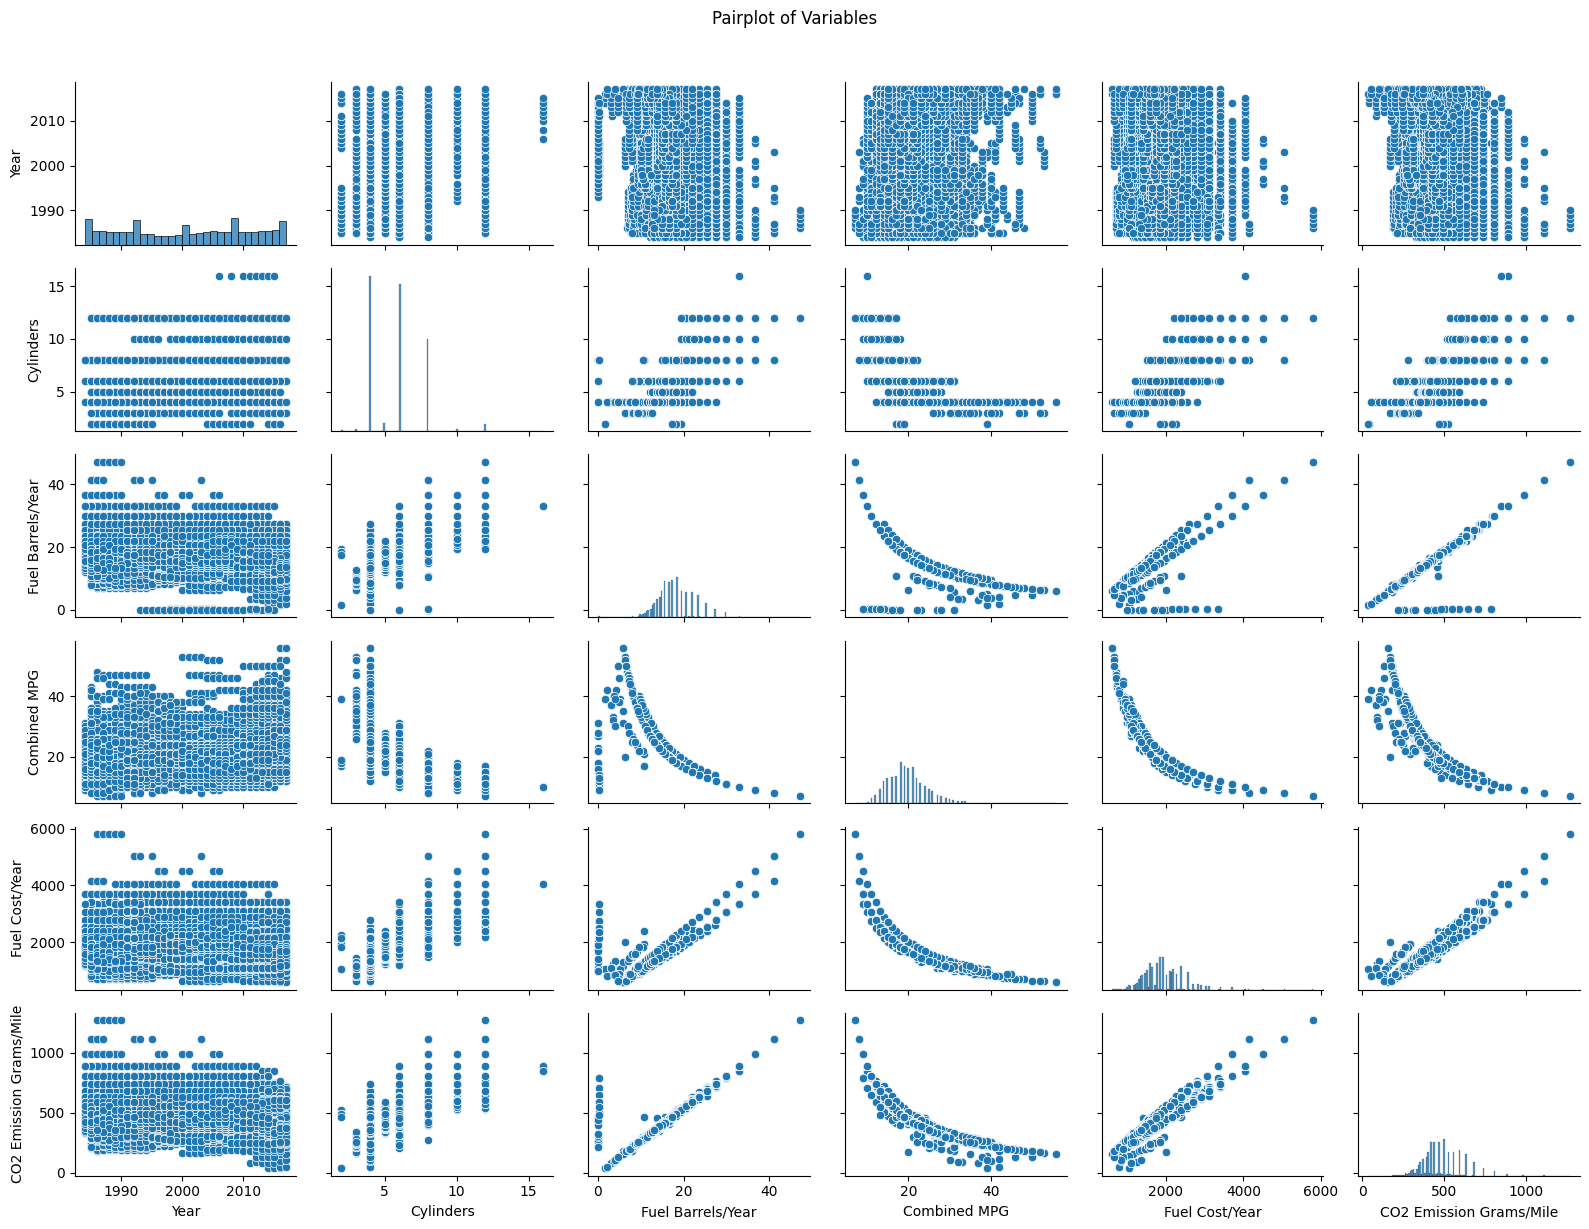

C:\Users\dbigman\AppData\Local\Temp\ipykernel_26772\1839721001.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pairplot.figure.show()


In [11]:
# per instructions we will use Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. 
# Calculating corr btw predictors and outcome variable
variables_for_correlation = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
correlation_matrix = vehicles[variables_for_correlation].corr()

# Extract correlations with the outcome variable
correlation_with_co2 = correlation_matrix['CO2 Emission Grams/Mile']

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# 1. Heatmap for correlation matrix
sns.heatmap(vehicles[variables_for_correlation].corr(), annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlation Matrix Heatmap")

# 2.Bar Plot Highlights var w strongest impact
abs_corr = correlation_with_co2.drop('CO2 Emission Grams/Mile').abs()
abs_corr.sort_values().plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title("Feature Importance by Correlation")
axes[1].set_xlabel("Absolute Correlation")

# Pairplot gives overview of pairwise relationships and potential patterns.
# display pairplot separately
pairplot = sns.pairplot(vehicles[variables_for_correlation])
pairplot.figure.suptitle("Pairplot of Variables", y=1.02)
pairplot.figure.set_size_inches(16, 12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
pairplot.figure.show()

# ## Analysis of Variables for Predicting CO2 Emissions

# Most Important Variable:
# - Fuel Barrels/Year:
#   - var has a strong positive linear relationship w CO2 Emissions
#   -  directly represents fuel consumption, a key driver of CO2 emissions.

# Least Important Variable:
# - Year:
#   - The relationship between Year and CO2 Emissions is weak and scattered.
#   - While newer vehicles might produce less CO2 due to improvements in technology, 
#     the variability within each year makes it less useful as a predictor

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


# per instructions we will use Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. 
# def predictors and target var
predictors = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
target = vehicles['CO2 Emission Grams/Mile']

# Split data into training and testing sets
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.2, random_state=17)

# Create and train the linear regression model
model = LinearRegression()
model.fit(predictors_train, target_train)

# Make predictions on the test set
target_pred = model.predict(predictors_test)

# Evaluate the sklearn model
mse = mean_squared_error(target_test, target_pred)
r2 = r2_score(target_test, target_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}, R-squared (R2): {r2:.2f}")


# Add a constant term to the predictors (for the intercept)
predictors_with_const = sm.add_constant(predictors)

# Choose model based on the data structure:
#
# Linear Regression: Use OLS, WLS, or GLS for standard regression problems.
# OLS: Use when residuals have constant variance, and no correlation among errors is evident (standard regression).
# WLS: Use when errors have non-constant variance , and you can define appropriate weights.
# GLS: Use when errors have non-constant variance and/or are correlated, especially in time series or clustered data.
# 
# Generalized Linear Models: Use GLM for non-Gaussian targets (e.g., Poisson, logistic).
# Time Series: Use ARIMA, SARIMAX, or ETS for time series data.

# Fit the regression model: Ordinary Least Squares minimizes the sum of the 
# squared residuals (errors) between the observed values (actual) and the predicted values (fitted by the model)
model_ols = sm.OLS(target, predictors_with_const).fit()
print("OLS Summary:")
print(model_ols.summary())

# Fit the regression model: Generalized Least Squares extends OLS to handle both non-constant variance and correlation among errors.

# Residuals and diagonal covariance matrix
residuals = model_ols.resid
sigma = np.diag(residuals**2)

# # Fit the GLS model using sigma
# model_gls = sm.GLS(target, predictors_with_const, sigma=sigma).fit()
# print("GLS Summary:")
# print(model_gls.summary())



Mean Squared Error (MSE): 216.67, R-squared (R2): 0.98
OLS Summary:
                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             22:00:29   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# | Variable            | Coefficient | t-value** | **p-value** | **Impact**                                                                 |
# |---------------------|------------|-------------|-------------|-----------------------------------------------------------------------------|
# | Fuel Barrels/Year   | 19.05      | 311.6       | < 0.0001    | Largest positive impact. Strongly correlated with fuel consumption.         |
# | Combined MPG        | -3.04      | -71.6       | < 0.0001    | Largest negative impact. higher fuel efficiency reduces emissions. |
# | Fuel Cost/Year      | 0.0323     | 67.0        | < 0.0001    | Positive impact.  indirect relationship with fuel consumption.       |
# | Year                | -0.3206    | -33.06      | < 0.0001    | Negative impact. Newer vehicles have lower emissions.     |
# | Cylinders           | 1.8788     | 22.6        | < 0.0001    | Positive impact. More cylinders mean larger engines and more fuel. |

# Conclusions from the Model
# R2 0.981 indicates that 98.1% of the variance in CO2 Emission Grams/Mile is explained by the predictors.
# This is a very strong result, suggesting a good fit to the data.

# F-statistic: 3.687e+05
# A very high value with a p-value = 0.00 shows that the model as a whole is statistically significant.

# Key Drivers of Emissions
# - Fuel consumption (Fuel Barrels/Year) is the primary driver of CO2 emissions.
# - Fuel efficiency (Combined MPG) significantly reduces emissions
# - Vehicle characteristics like Cylinders and Year also contribute to emissions but to a lesser extent.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'people_invited': [1, 3, 4, 6, 8, 9, 11, 14],
    'people_attended': [1, 2, 4, 4, 5, 7, 8, 13]
})



Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Intercept: -0.43939393939393945
Coefficients: [0.84848485]
R-squared (R²): 0.9316696375519905
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           0.000102
Time:                        22:22:39   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


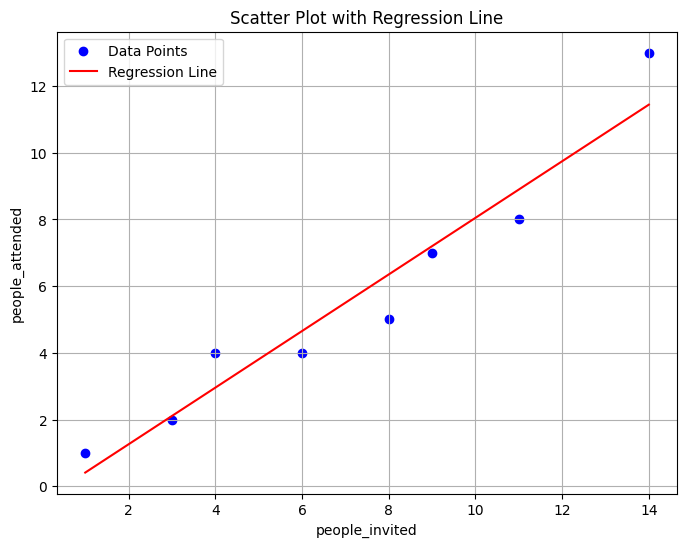

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Prepare data for regression
people_invited = data['people_invited'].values.reshape(-1, 1)
people_attended = data['people_attended'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(people_invited, people_attended)

# Print coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Calculate and print R²
r2 = model.score(people_invited, people_attended)
print(f"R-squared (R²): {r2}")

# Make predictions for the regression line
people_attended_pred = model.predict(people_invited)


# Add a constant term to predictors
people_invited_with_const = sm.add_constant(people_invited)

# Fit the OLS model
ols_model = sm.OLS(people_attended, people_invited_with_const).fit()

# Print the full summary
print(ols_model.summary())


# Plot the scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(people_invited, people_attended, color='blue', label='Data Points')  # Scatter plot
plt.plot(people_invited, people_attended_pred, color='red', label='Regression Line')  # Regression line
plt.title('Scatter Plot with Regression Line')
plt.xlabel('people_invited')
plt.ylabel('people_attended')
plt.legend()
plt.grid()
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Intercept: -0.43939393939393945
# Coefficients: [0.84848485]
# R-squared (R²): 0.9316696375519905
#                             OLS Regression Results                            
# ==============================================================================
# Dep. Variable:                      y   R-squared:                       0.932
# Model:                            OLS   Adj. R-squared:                  0.920
# Method:                 Least Squares   F-statistic:                     81.81
# Date:                Wed, 08 Jan 2025   Prob (F-statistic):           0.000102
# Time:                        22:22:39   Log-Likelihood:                -10.800
# No. Observations:                   8   AIC:                             25.60
# Df Residuals:                       6   BIC:                             25.76
# Df Model:                           1                                         
# Covariance Type:            nonrobust                                         
# ==============================================================================
#                  coef    std err          t      P>|t|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
# x1             0.8485      0.094      9.045      0.000       0.619       1.078
# ==============================================================================
# Omnibus:                        0.556   Durbin-Watson:                   1.867
# Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
# Skew:                           0.261   Prob(JB):                        0.773
# Kurtosis:                       1.873   Cond. No.                         16.3
# ==============================================================================

# Notes:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


# Positive Relationship: Inviting more people generally leads to more attendees.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [21]:
from scipy.stats import zscore

# Calculate Z-scores for both variables
data['Z_Score_people_invited'] = zscore(data['people_invited'])
data['Z_Score_people_attended'] = zscore(data['people_attended'])

# Identify outliers
outliers = data[(abs(data['Z_Score_people_invited']) > 3) | (abs(data['Z_Score_people_attended']) > 3)]

# Check if the outliers dataframe is empty
if outliers.empty:
    print("There are no extreme outliers according to the Z-score method.")
else:
    print("Outliers:\n", outliers)


There are no extreme outliers according to the Z-score method.


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

I don't see a reason to discard any points. 